In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import LSTM, Dense,ZeroPadding3D
from keras.models import Sequential

dir = '/content/drive/MyDrive/squat dataset'
test_file = pd.read_csv(dir+'/test.csv',skip_blank_lines=False,sep="\n")
colors = ['r','g','b']

def read_csv_to_np(csv_file):
  test_dataset=[]
  li = []
  for row in test_file.iterrows():
    d = row[1][0]
    if(pd.isnull(d)):
      test_dataset.append(np.asarray(li).astype('float32'))
      li = []
    else :
      d = np.asarray(list(map(float,d.split(',')))).astype('float32')
      li.append(d)
  
  test_dataset = tf.keras.preprocessing.sequence.pad_sequences(test_dataset, padding = "pre")
  return np.asarray(test_dataset).astype('float32')

X = read_csv_to_np(test_file)
Y = np.asarray([1,1]).astype(np.float32)
print(X.shape) #expect (2,58,4)

idx = 1
for x in X:
  plt.plot(x, color = colors[idx-1])
  plt.xlabel('frames')
  plt.ylabel('angle')
  idx += 1
plt.show()

FileNotFoundError: ignored

In [ ]:
#sequence padding
#tf.keras.preprocessing.sequence.pad_sequences(X)
X_SHAPE = X.shape
print(X_SHAPE)

model = Sequential()
model.add(LSTM(units = 1, activation='relu', return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X,Y,validation_split=0.2, epochs=1000, verbose=1)
model.summary()

(2, 58, 4)
Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.7047 - accuracy: 0.0000e+00 - val_loss: 0.6956 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7010 - accuracy: 0.0000e+00 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6991 - accuracy: 0.0000e+00 - val_loss: 0.6939 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6976 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.6964 - accuracy: 0.0000e+00 - val_loss: 0.6926 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6953 - accuracy: 0.0000e+00 - val_loss: 0.6920 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6943 - accuracy: 0.0000e+00 - 

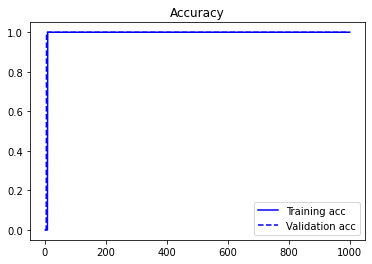

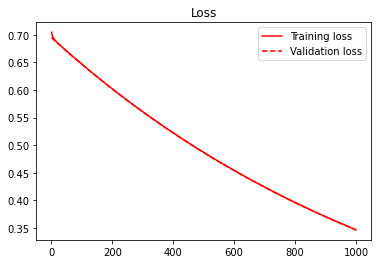

In [ ]:
#결과 plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#accuracy plotting
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'b--', label = 'Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

#loss plotting
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'r--', label = 'Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
SAVED_MODEL_PATH = './drive/MyDrive/saved_model/squat'
tf.saved_model.save(model, SAVED_MODEL_PATH)

In [ ]:
imported = tf.saved_model.load(SAVED_MODEL_PATH)

print(imported(X)[0][0].numpy())

0.70717275
